In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris


In [26]:
# Task 1: Binary Classification with Logistic Regression
# ● Load the Breast Cancer Dataset from sklearn.datasets.
# ● Train a logistic regression model to predict whether a tumor is benign or malignant.
# ● Evaluate using:
# ○ Accuracy
# ○ Confusion Matrix
# ○ Precision, Recall, F1-score
# ○ ROC-AUC curve

In [37]:
# a)Load dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [38]:
#b) Train the Model and Predict the Date
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


ROC-AUC Score: 0.9977071732721913


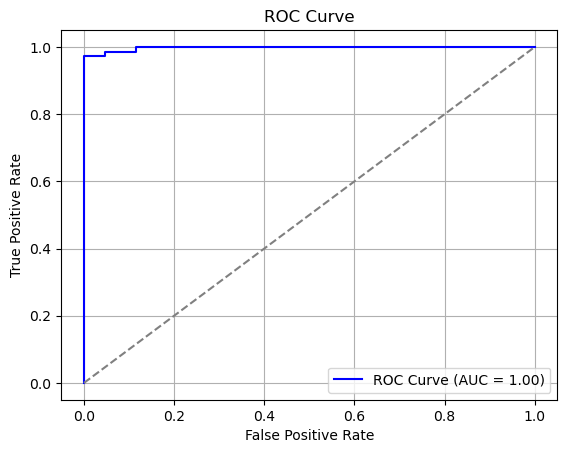

In [51]:
# c)Evaluate
acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", acc)
print("Confusion Matrix:")
print(matrix)
print()
print("Classification Report:")
print(rep)
print()
print("ROC-AUC Score:", roc_auc)
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Task 2: Threshold Tuning and Probability Interpretation
# ● Predict the probability of the positive class.
# ● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change.
# ● Plot the ROC curve and mark optimal threshold.

In [41]:
#a) Predict the Probability of the positive class
y_prob = model.predict_proba(X_test)[:, 1]

In [47]:
#b)Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change.
def evaluate(threshold):
    value = (y_prob >= threshold).astype(int)
    matrix = confusion_matrix(y_test,value)
    f1 = sklearn.metrics.f1_score(y_test, value)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:")
    print(matrix)
    print("F1 Score:", round(f1, 3))

for i in [0.3, 0.5, 0.7]:
    evaluate(i)
    print()


Threshold: 0.3
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.966

Threshold: 0.5
Confusion Matrix:
[[39  4]
 [ 1 70]]
F1 Score: 0.966

Threshold: 0.7
Confusion Matrix:
[[41  2]
 [ 1 70]]
F1 Score: 0.979



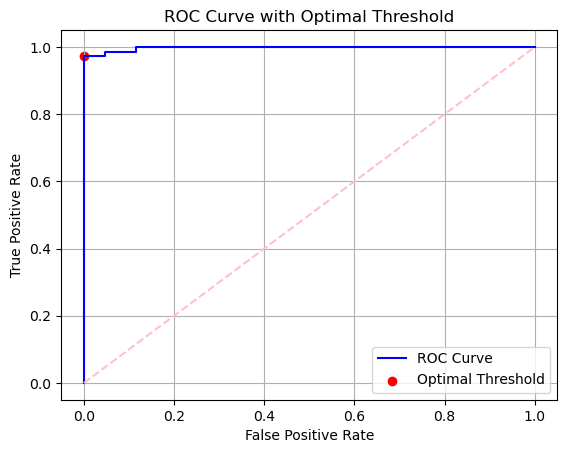

In [50]:
#c)Plot the ROC curve and mark optimal threshold.

#roc curve
fpr, tpr, th = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Optimal Threshold
j_scores = tpr - fpr
index = np.argmax(j_scores)
threshold = th[opt_index]

# Plot ROC curve with optimal threshold
plt.plot(fpr, tpr, label="ROC Curve", color='blue')
plt.scatter(fpr[index], tpr[index], color='red', label="Optimal Threshold")
plt.plot([0,1], [0,1], linestyle='--', color='pink')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Task 3: Multiclass Classification (Optional)
# ● Use the Iris Dataset to perform multiclass logistic regression.
# ● Use one-vs-rest or multinomial strategy.
# ● Evaluate model accuracy and classification report.

In [31]:
a)Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [34]:
#b)  Using One-vs-Rest Strategy
X_train, X_test, y_train, y_test = train_test_split(X, y)
model1= LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [35]:
#c) Evaluation
acc=accuracy_score(y_test, y_pred1)
rep=classification_report(y_test, y_pred1, target_names=class_names)
print("Accuracy:", acc)
print("Classification Report:")
print(rep)

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

